In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.linalg import pascal

# Задание

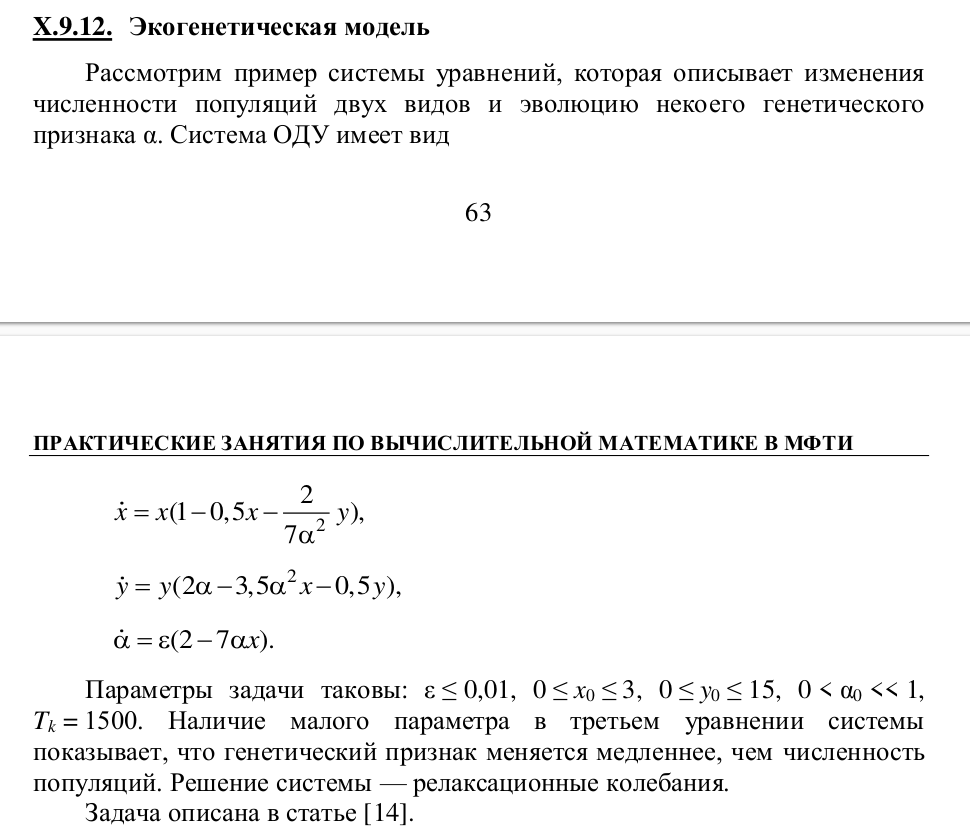

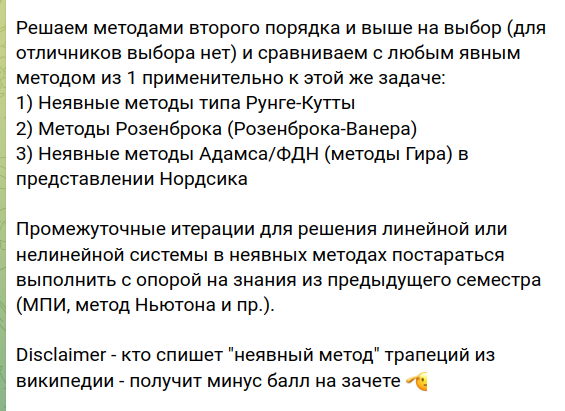

In [92]:
xi = 0.01

In [93]:
n, m = 3, 3

In [94]:
f1 = lambda x, y, a: x*(1 - 0.5*x - (2*y) / (7*a*a))
f2 = lambda x, y, a: y*(2*a - 3.5*a*a*x - 0.5*y)
f3 = lambda x, y, a: xi*(2 - 7*a*x)

In [98]:
x0 = 3
y0 = 7.5
a0 = 0.001
t0 = 0

In [99]:
def func(args):
    x, y, a = args
    
    return np.array(
        [
            f1(x, y, a), f2(x, y, a), f3(x, y, a)
        ]
    )

## Неявный метод типа Рунге-Кутты

### Метод Лобатто IIIB 4-го порядка:

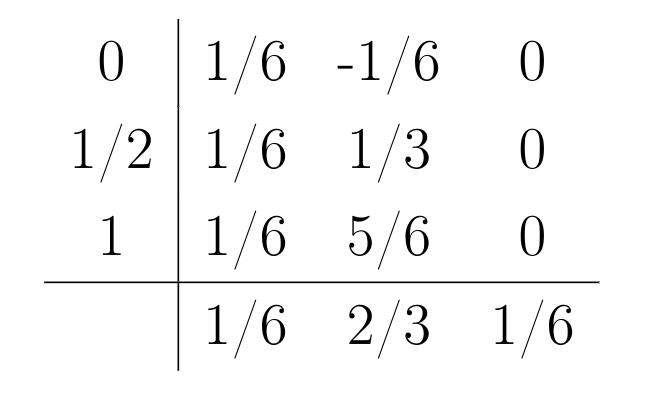

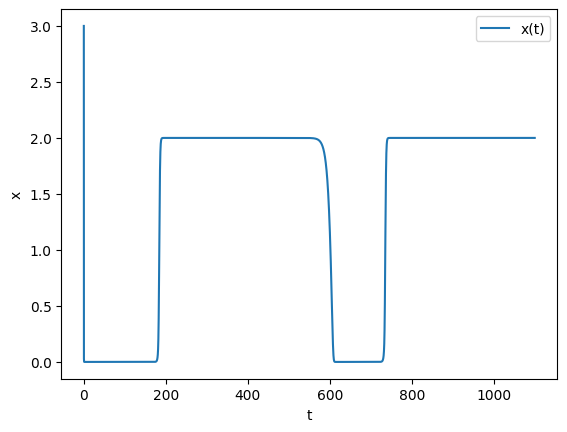

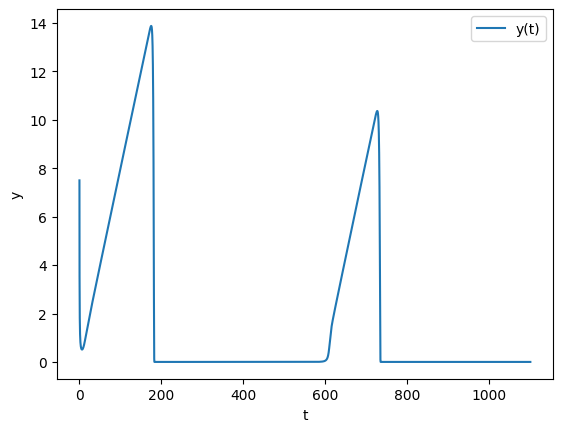

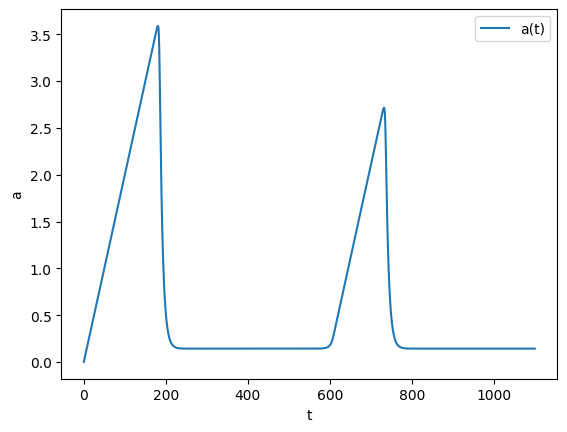

In [104]:
time = [t0]
x_values = [x0]
y_values = [y0]
a_values = [a0]

y_n = np.array([x0, y0, a0])

t = t0
t_end = 1100
dt = 0.05

while t < t_end:
    def fsolve_func(k):
        k1, k2, k3 = k.reshape((n, m))
    
        return np.array(
            [
                k1 - func(y_n + (1/6)*dt*k1 + (-1/6)*dt*k2),
                k2 - func(y_n + (1/6)*dt*k1 + ( 1/3)*dt*k2),
                k3 - func(y_n + (1/6)*dt*k1 + ( 5/6)*dt*k2)
            ]
        ).flatten()
    
    k1, k2, k3 = fsolve(fsolve_func, np.zeros(n * m)).reshape((n, m))
    
    y_n += dt*((1/6)*k1 + (2/3)*k2 + (1/6)*k3)
    
    time.append(t)
    x_values.append(y_n[0])
    y_values.append(y_n[1])
    a_values.append(y_n[2])

    t += dt

plt.figure(1)
plt.plot(time, x_values, label='x(t)')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()

plt.figure(2)
plt.plot(time, y_values, label='y(t)')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()

plt.figure(3)
plt.plot(time, a_values, label='a(t)')
plt.xlabel('t')
plt.ylabel('a')
plt.legend()

plt.show()

## Схема Розенброка с комплексными коэффициентами второго порядка (CROS)

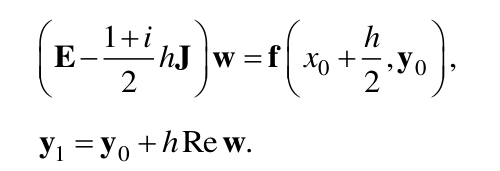

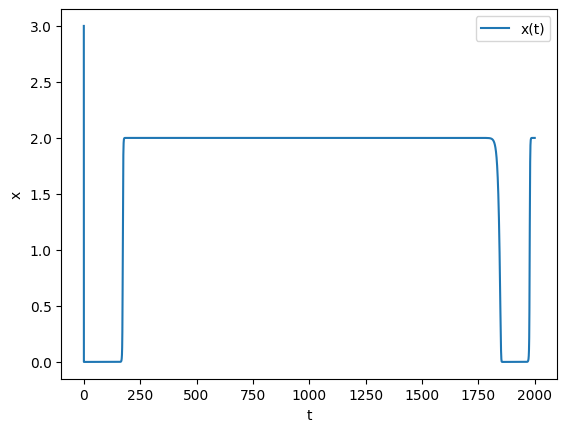

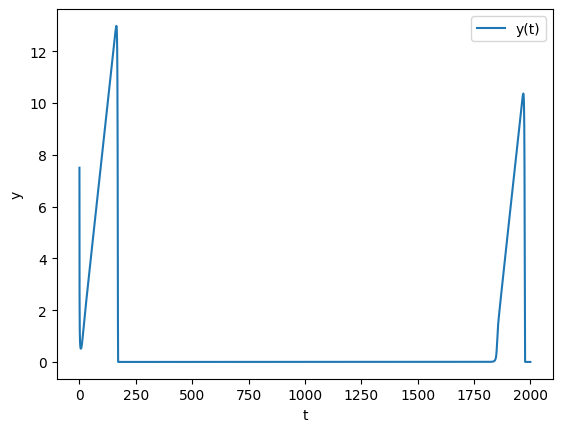

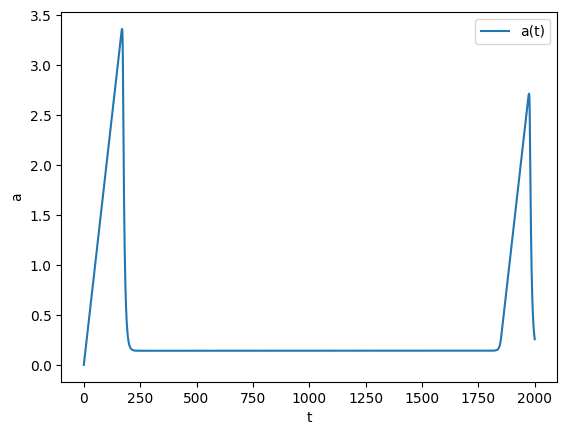

In [105]:
time = [t0]
x_values = [x0]
y_values = [y0]
a_values = [a0]

y_n = np.array([x0, y0, a0])

t = t0
t_end = 2000
dt = 0.02

F = [f1, f2, f3]

def calculate_J(u):
    def derivative(i, j, h=1e-2):
        return (F[i](*(u + np.array([h if index == j else 0 for index in range(n)]))) - F[i](*u)) / h

    J = np.zeros(shape=(n, n))

    for i in range(n):
        for j in range(n):
            J[i, j] = derivative(i, j)

    return J

while t < t_end:
    J = calculate_J(y_n)

    a = np.eye(n) - (0.5 + 0.5j)*dt*J
    b = func(y_n)
    
    w = np.linalg.solve(a, b)

    y_n += dt*w.real
    
    time.append(t)
    x_values.append(y_n[0])
    y_values.append(y_n[1])
    a_values.append(y_n[2])

    t += dt

plt.figure(1)
plt.plot(time, x_values, label='x(t)')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()

plt.figure(2)
plt.plot(time, y_values, label='y(t)')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()

plt.figure(3)
plt.plot(time, a_values, label='a(t)')
plt.xlabel('t')
plt.ylabel('a')
plt.legend()

plt.show()

## Представление Нордсика

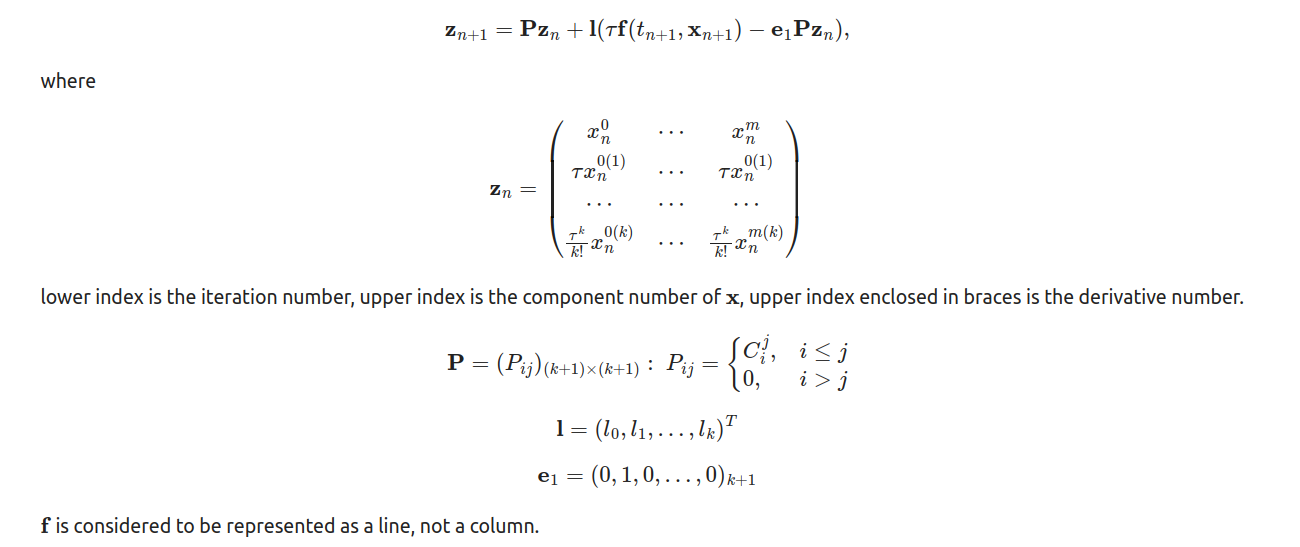

### ФДН

$ l = (\frac{2}{3}, 1, \frac{1}{3}) $

In [107]:
a0 = 0.5

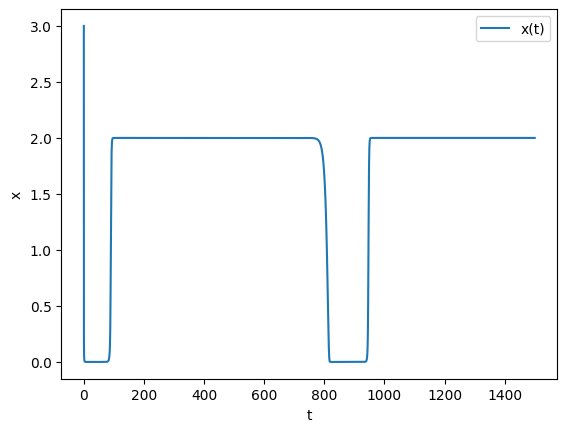

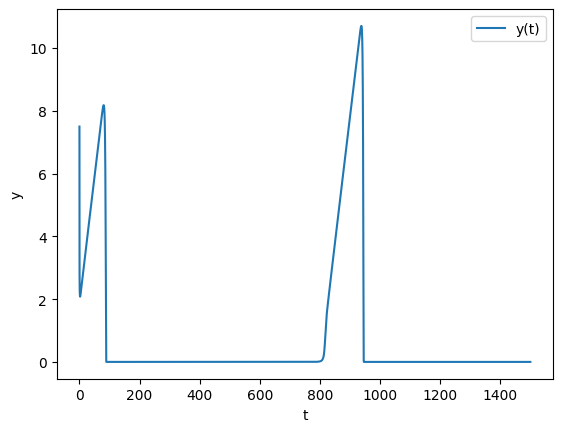

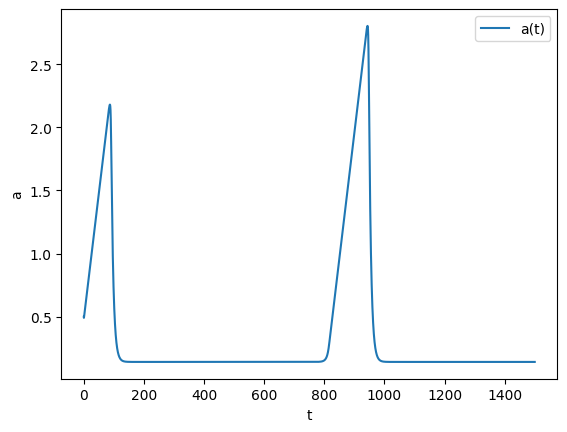

In [108]:
time = [t0]
x_values = [x0]
y_values = [y0]
a_values = [a0]

y_n = np.array([x0, y0, a0])

l = np.array([2/3, 1, 1/3])

k = len(l)

z = np.zeros(shape=(k, n))
z[0] = y_n

e = np.zeros(k)
e[1] = 1

P = pascal(k, kind='upper')

t = t0
t_end = 1500
dt = 0.05

while t < t_end:
    Q = P @ z
    z = Q + np.outer(l, (dt * func(y_n) - e @ Q))

    y_n = z[0]
    
    time.append(t)
    x_values.append(y_n[0])
    y_values.append(y_n[1])
    a_values.append(y_n[2])

    t += dt

plt.figure(1)
plt.plot(time, x_values, label='x(t)')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()

plt.figure(2)
plt.plot(time, y_values, label='y(t)')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()

plt.figure(3)
plt.plot(time, a_values, label='a(t)')
plt.xlabel('t')
plt.ylabel('a')
plt.legend()

plt.show()